# Logistic regression lab solutions
[Book](https://www.statlearning.com/) Exercise problems on Chapter 4: Logistic regression

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm

# 6

## 6a

In [6]:
1/(1+np.exp(-(-6+0.05*40+3.5)))

0.3775406687981454

## 6b

In [7]:
(6-3.5)/0.05

50.0

# 6c
How much should the number of hours studied increase so that the odds of getting an A double?

In [10]:
(np.log(2))/0.05

13.862943611198904

# 9a

In [332]:
0.37/(0.37+1)

0.27007299270072993

# 9b

In [333]:
0.16/(1-0.16)

0.1904761904761905

# 13

In [345]:
data = pd.read_csv('Weekly.csv')

In [346]:
data

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up
...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,Up


In [347]:
data['y']=0
data.loc[data.Direction=='Up','y']=1

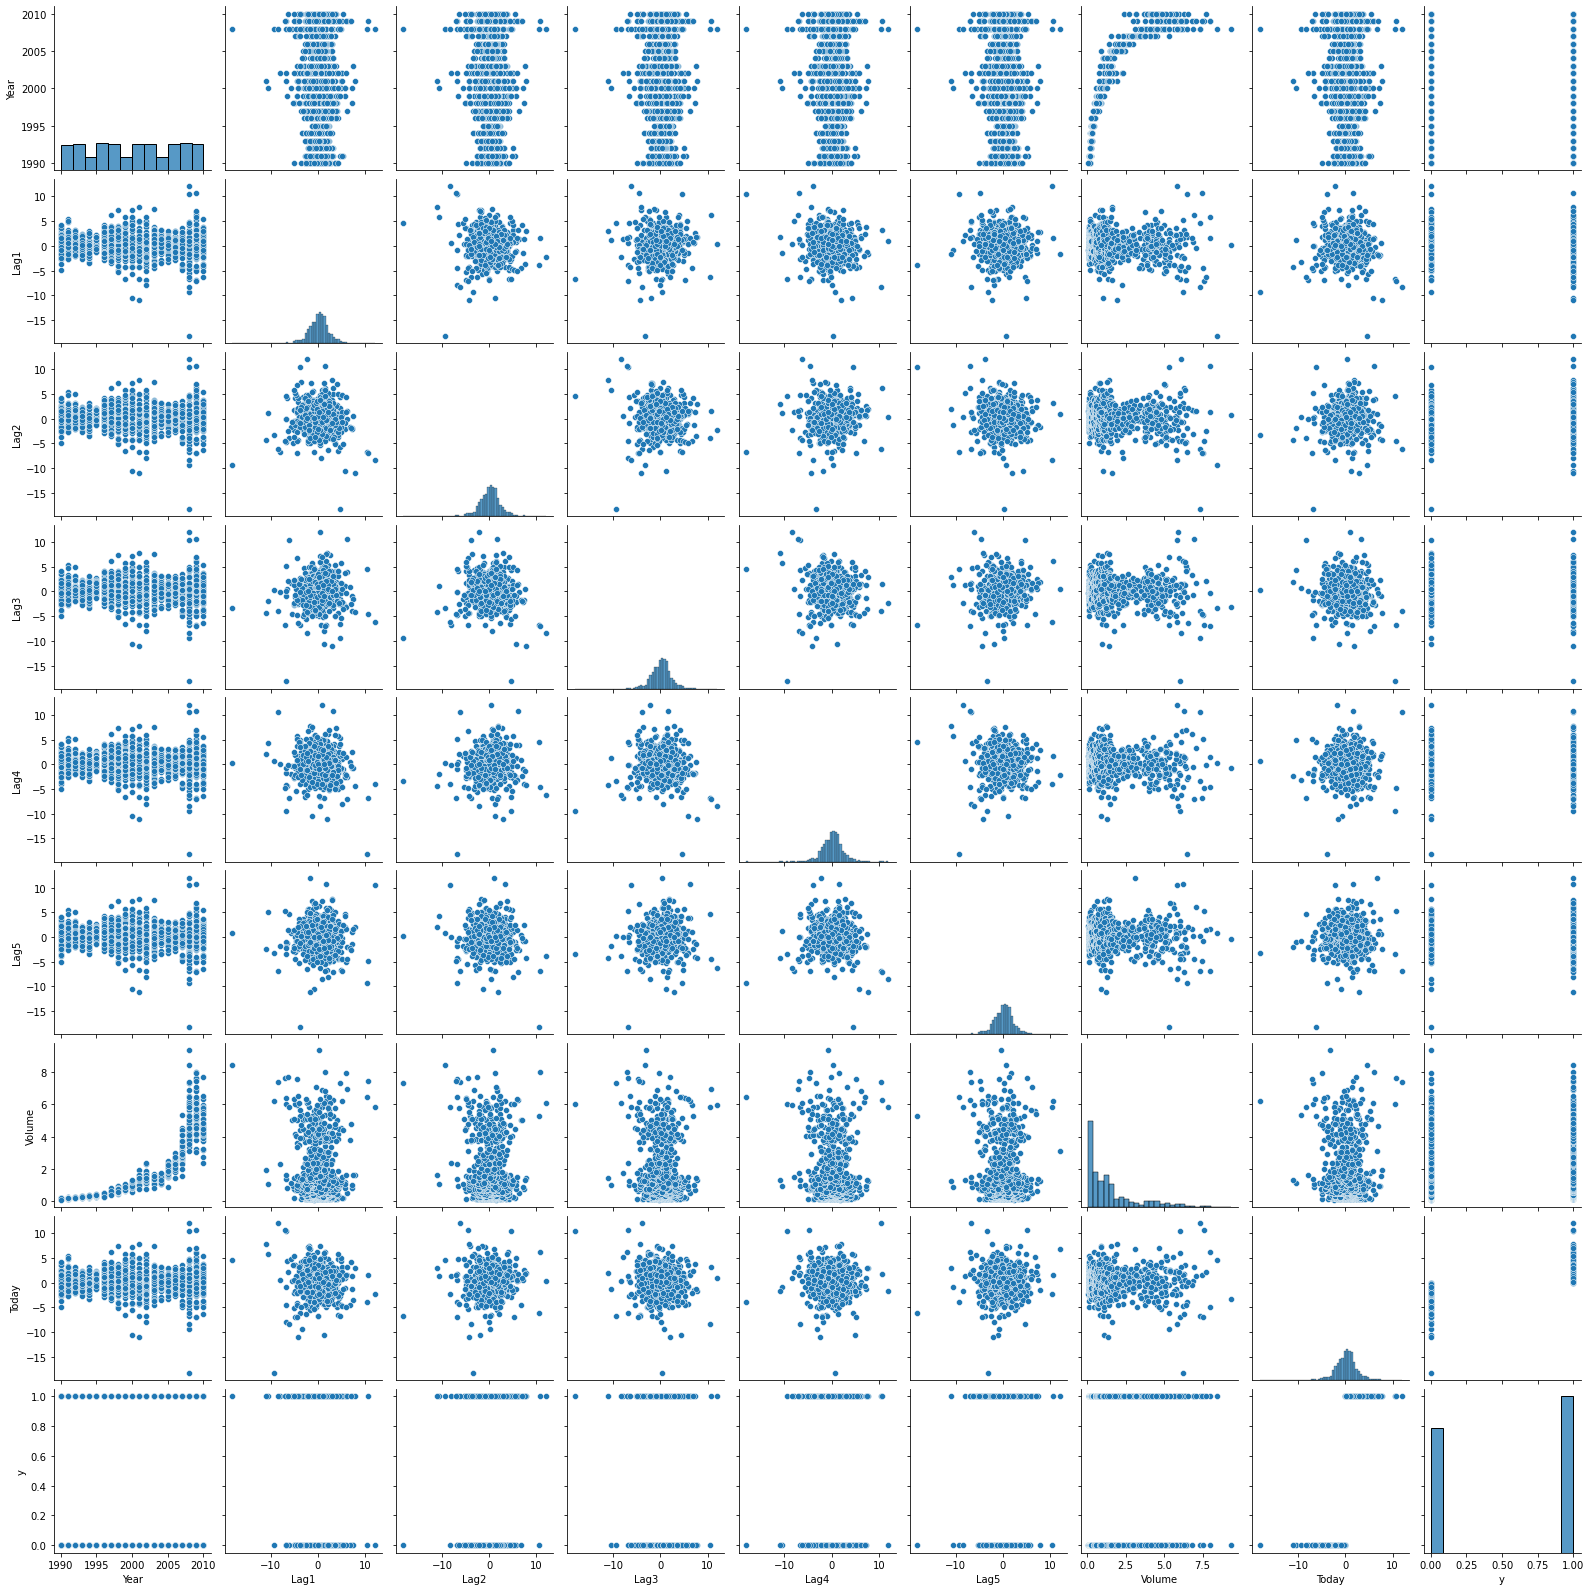

In [349]:
sns.pairplot(data)

In [350]:
logit_model = sm.logit(formula = 'y~Lag1+Lag2+Lag3+Lag4+Lag5+Volume', data = data).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Mon, 07 Feb 2022   Pseudo R-squ.:                0.006580
Time:                        02:40:59   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.026     -1.563      0.118      -0.093       0.010
Lag2           0.0584      0.027      2.175      0.030       0.006       0.111
Lag3          -0.0161      0.027     -0.602      0.547      -0.068       0.036
Lag4          -0.0278      0.026     -1.050      0.294      -0.080       0.024
Lag5          -0.0145      0.026     -0.549      0.583      -0.066       0.037
Volume        -0.0227      0.037     -0.616      0.538      -0.095       0.050
==============================================================================
"""

Lag 2 is statistically significant

In [353]:
confusion_matrix_train(logit_model)

(          Predicted 0  Predicted 1
 Actual 0         54.0        430.0
 Actual 1         48.0        557.0,
 56.10651974288338)

In [358]:
train = data[data.Year<=2008]

In [360]:
test = data.drop(train.index)

In [361]:
logit_model = sm.logit(formula = 'y~Lag2', data = data).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.684306
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1087
Method:                           MLE   Df Model:                            1
Date:                Mon, 07 Feb 2022   Pseudo R-squ.:                0.003866
Time:                        02:44:56   Log-Likelihood:                -745.21
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                   0.01617
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2147      0.061      3.507      0.000       0.095       0.335
Lag2           0.0628      0.026      2.382      0.017       0.011       0.114
==============================================================================
"""

In [363]:
confusion_matrix_test(test,test.y,logit_model)

(          Predicted 0  Predicted 1
 Actual 0          9.0         34.0
 Actual 1          5.0         56.0,
 0.625)